# Exploration

This notebook is used for functional exploration, in order to figure out how things work, so that they then can be implemented in the allskycam.py-Module


In [2]:
import allskycam

import ipywidgets as widgets
from IPython.display import display

from io import BytesIO
from time import sleep
from picamera import PiCamera

from matplotlib import pyplot as plt



## Camera capture to stream and display single image using PiCamera

In [3]:
stream = BytesIO()

# grab image from camera
with PiCamera() as camera:
    camera.capture(stream, format='jpeg')
    stream.seek(0)
    jpeg_image = stream.read()

# display image
widgets.Image(
    value=jpeg_image,
    format='jpg',
    width=900
)

Image(value=b'\xff\xd8\xff\xe1c\xd8Exif\x00\x00MM\x00*\x00\x00\x00\x08\x00\n\x01\x00\x00\x04\x00\x00\x00\x01\x…

## Camera capture to stream and display sequence of images using PiCamera

In [ ]:
stream = BytesIO()

wgt = widgets.Image(
    format='jpeg',
    width=900
)
display(wgt)

# grab image from camera
with PiCamera() as camera:
    for i in range(100):
        camera.capture(stream, format='jpeg')
        stream.seek(0)
        jpeg_image = stream.read()
        wgt.value = jpeg_image

Image(value=b'', format='jpeg', width='900')

## Acessing and controlling the camera

In [ ]:
from picamera import PiCamera
from time import sleep
from fractions import Fraction
PiCamera.CAPTURE_TIMEOUT = 120



In [ ]:
# Force sensor mode 3 (the long exposure mode), set
# the framerate to 1/6fps, the shutter speed to 6s,
# and ISO to 800 (for maximum gain)
with PiCamera( framerate=Fraction(1, 30), sensor_mode=3) as camera:
    allskycam.set_analog_gain(camera, 16)
    allskycam.set_digital_gain(camera, 1)
    camera.resolution = (1024, 768)
    camera.still_stats = False
    camera.shutter_speed = 30000000
    camera.exposure_mode = 'off'
    camera.awb_mode = 'off'
    camera.capture('img.jpg', format='jpeg')
    camera.close()
    my_stream.seek(0)
    jpeg = my_stream.read()

In [47]:
imw = widgets.Image(format='jpg')
imw.value = jpeg
display(imw)

Image(value=b'\xff\xd8\xff\xe1c\xc2Exif\x00\x00MM\x00*\x00\x00\x00\x08\x00\n\x01\x00\x00\x04\x00\x00\x00\x01\x…

In [43]:
len(jpeg)

3283273

In [8]:
from matplotlib import pyplot as plt

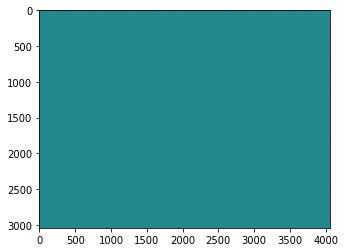

In [5]:
plt.imshow(rgb);

In [6]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://www.piwheels.org/simple
     |████████████████████████████████| 35.3 MB 7.6 kB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 885 kB 2.2 MB/s            
     |████████████████████████████████| 1.4 MB 618 kB/s            
     |████████████████████████████████| 1.3 MB 634 kB/s            
  Created wheel for matplotlib: filename=matplotlib-3.5.1-cp37-cp37m-linux_armv7l.whl size=10791979 sha256=4461069cd16d210eeac0f8de5113ca77e96529403be0c074a914cab8cdb084dc
  Stored in directory: /home/pi/.cache/pip/wheels/40/3b/dc/f067096d67209eba9010d8fef296190fa96a4c4e16b26d73b6
Successfully built matplotlib
